<a href="https://colab.research.google.com/github/Ray-shreya98/TSF-GRIP-TASK-1-ML-Predictor/blob/main/TSF_GRIP_TASK_1_Shreya_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP JULY'21**

**NAME- SHREYA RAY**

**TASK 1: PREDICTION USING SUPERVISED ML**

**Importing all required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading and understanding data**

In [ ]:
#Reading data from a link

url = "http://bit.ly/w-data"
s_data= pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Plotting the distribution of scores**

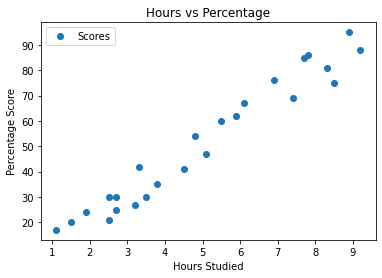

In [ ]:
#Exploratory Data Analysis

s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and the percentage of score

**Splitting the data using Linear Regression**

Next we divide the data into "attributes"'(inputs) and "labels"(outputs)

In [ ]:
x = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

Now after dividing the data into attributes and labels our next step is to split this data into training and test sets. We will do this by using Scikit-Learn's built in train_test_split()method

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Training the Algorithm**

We have splitted our data into training and testing sets and now it is the final time to train our algorithms.

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete")

Training Complete


**Plotting the Linear Regression Line**

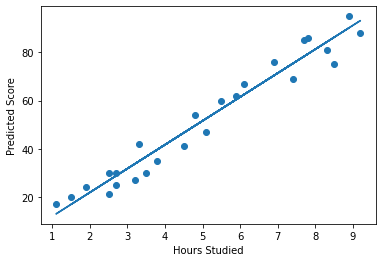

In [ ]:
line = regressor.coef_*x+regressor.intercept_

#scatter plot

plt.scatter(x, y)
plt.plot(x, line);
plt.xlabel('Hours Studied')
plt.ylabel('Predicted Score')
plt.show()

**Model Predictions**

Now after training the algorithms its time to predict the model.

In [ ]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Now we compare the actual and predicted values

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be the predicted score if a student studies for 9.25 hrs/day?**

In [ ]:
print("Predicted Score =", regressor.predict([[9.25]]))

Predicted Score = [93.69173249]


**Evaluation of the Model**

Now the final step is to evaluate the performance of algorithms. This step is particularly important to compare how well different algorithms perform on a particular dataset. However, for simplicity, we have chosen mean absolute error and mean squared error.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
